#Step 1: Setup and installation


In [1]:
#pip install pandas sqlite3 requests


#Step 2: Create app.py


In [2]:
print("Hello world")


Hello world


#Step 3: Download the data using the request library


In [3]:
#Use the requests library to download the data.
import requests

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
response = requests.get(url)
html_data = response.text

#Step 4: Parse the HTML data using BeautifulSoup


In [4]:
from bs4 import BeautifulSoup
import pandas as pd
from colorama import Fore, Style

# Instala la biblioteca html5lib si no está instalada
# pip install html5lib

soup = BeautifulSoup(html_data, 'html.parser')
table = soup.find_all('table')[0]  # Assuming the Tesla quarterly revenue table is the second table

tesla_revenue = pd.read_html(str(table), flavor='html5lib')[0]

# Rename columns
tesla_revenue.columns = ['Date', 'Revenue']

# Remove comma and dollar sign from Revenue column
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace(',', '').str.replace('$', '')

# Print message in blue color
print(Fore.GREEN + "Tesla Quarterly Revenue" + Style.RESET_ALL + "\n")
# Print table in white color
print(tesla_revenue)

# Reset color settings
print(Style.RESET_ALL)

Tesla Quarterly Revenue

    Date Revenue
0   2022   81462
1   2021   53823
2   2020   31536
3   2019   24578
4   2018   21461
5   2017   11759
6   2016    7000
7   2015    4046
8   2014    3198
9   2013    2013
10  2012     413
11  2011     204
12  2010     117
13  2009     112



/tmp/ipykernel_1875/4066278532.py:17: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace(',', '').str.replace('$', '')


#Step 5: Clean rows


In [5]:
# Remove rows with empty strings or NaN in the Revenue column
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'].notna() & (tesla_revenue['Revenue'] != '')]

# Print message in blue color
print(Fore.GREEN + "Tesla Quarterly Revenue Cleaned" + Style.RESET_ALL + "\n")
# Print table in white color
print(tesla_revenue)



Tesla Quarterly Revenue Cleaned

    Date Revenue
0   2022   81462
1   2021   53823
2   2020   31536
3   2019   24578
4   2018   21461
5   2017   11759
6   2016    7000
7   2015    4046
8   2014    3198
9   2013    2013
10  2012     413
11  2011     204
12  2010     117
13  2009     112


#Step 6: Insert the data into SQLite


In [6]:
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
tesla_revenue

,Date,Revenue
0,2022,81462
1,2021,53823
2,2020,31536
3,2019,24578
4,2018,21461
5,2017,11759
6,2016,7000
7,2015,4046
8,2014,3198
9,2013,2013


#Step 7: Connect to SQLite


In [7]:
import sqlite3

# Create a connection object
conn = sqlite3.connect('Tesla.db')

#Step 8: Create a table in our database to store revenue values:


In [8]:
cursor = conn.cursor()

# Create table
cursor.execute("CREATE TABLE IF NOT EXISTS Revenue (Date TEXT, Revenue TEXT)")

# Commit the changes
conn.commit()

#Step 9: Retrieve the data from the database


In [9]:
for row in conn.execute('SELECT * FROM revenue'):
    print(row)

#Step 10: Finally, create a plot to visualize the data


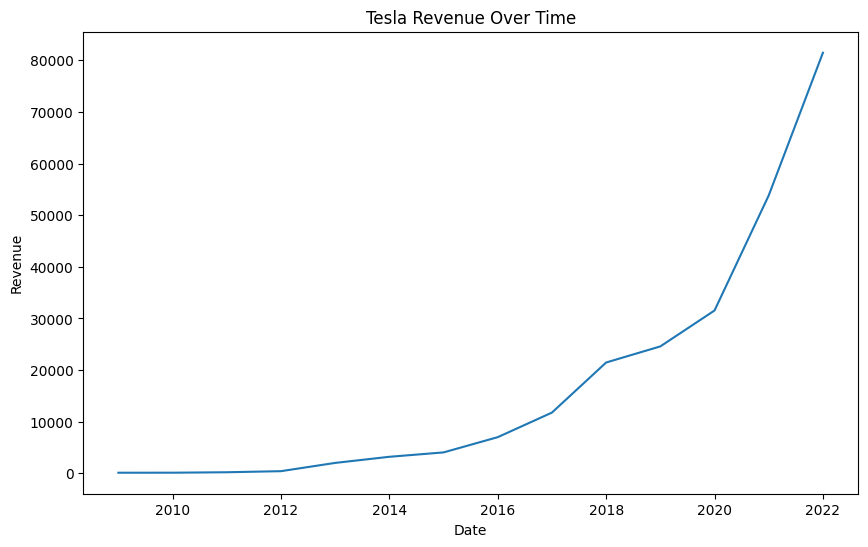

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ordenar los datos por la columna 'Date' de forma ascendente
tesla_revenue = tesla_revenue.sort_values('Date')

# Convertir la columna 'Revenue' a tipo numérico
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].astype(int)

# Crear el gráfico utilizando Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=tesla_revenue, x='Date', y='Revenue')

# Establecer el título y las etiquetas del gráfico
plt.title('Tesla Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')

# Mostrar el gráfico
plt.show()